<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [3]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [118]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
job = pd.read_csv('data/job_listings.csv')
# job.head()

job0_html = job['description'][0]
job.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [119]:
job['title'].value_counts()

Data Scientist                                   150
Senior Data Scientist                             14
Junior Data Scientist                             10
Associate Data Scientist                           8
Data Scientist Intern                              7
                                                ... 
Data Scientist- Enterprise Product Analytics       1
Data Scientist – Intern (Summer 2019)              1
People Data Scientist                              1
Advisor: CCO Audience Strategy - Data Science      1
Data Science Internships                           1
Name: title, Length: 177, dtype: int64

In [120]:
soup = BeautifulSoup(job0_html, 'html.parser')
print(soup.prettify())

b"
<div>
 <div>
  Job Requirements:
 </div>
 <ul>
  <li>
   <p>
    \nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them
   </p>
   \n
  </li>
  <li>
   <p>
    Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)
   </p>
   \n
  </li>
  <li>
   <p>
    Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R
   </p>
   \n
  </li>
  <li>
   <p>
    Ability to communicate Model findings to both Technical and Non-Technical stake holders
   </p>
   \n
  </li>
  <li>
   <p>
    Hands on experience in SQL/Hive or similar programming language
   </p>
   \n
  </li>
  <li>
   <p>
    Must show past work via GitHub, Kaggle or any other published article
   </p>
   \n
  </li>
  <

In [121]:
# Get HTML title
print('Title', soup.title)

Title None


In [122]:
# Extract URLs
# for link in soup.find_all('a'):
#     print(link.get('href'))

In [123]:
# Text extraction
print(soup.get_text())

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [124]:
print(soup.get_text().encode().decode('unicode_escape'))

b"Job Requirements:
Conceptual understanding in Machine Learning models like NaiÂ¨ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them
Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)
Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R
Ability to communicate Model findings to both Technical and Non-Technical stake holders
Hands on experience in SQL/Hive or similar programming language
Must show past work via GitHub, Kaggle or any other published article
Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field.
Apply Now"


In [129]:
# Trying something
from ast import literal_eval

s = soup.get_text().replace('\\n', ' ')
s = literal_eval(repr(s).replace('\\\\', '\\'))
# s = re.sub(r'[^\x00-\x7f]', r'', s)

In [130]:
s

'b"Job Requirements: Conceptual understanding in Machine Learning models like NaiÂ¨ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"'

In [147]:
# Un-HTML-ify the listing descriptions
listings = []
for listing in job['description']:
    pretty = BeautifulSoup(listing, 'html.parser')
    s = pretty.get_text().replace('\\n', ' ')
#     s = literal_eval(repr(s).replace('\\\\', '\\'))
    listings.append(s[2:-1]) # Indexing to get rid of the b'' portion
listings[0]

"Job Requirements: Conceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"

In [148]:
job['description_parsed'] = listings
job.head()

,Unnamed: 0,description,title,description_parsed
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations ...


## 2) Use Spacy to tokenize the listings 

In [158]:
##### Your Code Here #####
def tokenize(text):
    tokens = re.sub("[^a-zA-Z ^0-9 \s]", ' ', text)
    tokens = re.sub(r'[^\x00-\x7f]', r'', tokens)
    tokens = tokens.lower()
    
    return tokens

In [159]:
job['description_parsed'].apply(tokenize)

0      job requirements  conceptual understanding in ...
1      job description  as a data scientist 1  you wi...
2      as a data scientist you will be working on con...
3       4 969    6 756 a monthcontractunder the gener...
4      location  usa  xe2 x80 x93 multiple locations ...
                             ...                        
421    about us  want to be part of a fantastic and f...
422    internshipat uber  we ignite opportunity by se...
423     200 000    350 000 a yeara million people a y...
424    senior data scientist job description  about u...
425    cerner intelligence is a new  innovative organ...
Name: description_parsed, Length: 426, dtype: object

In [160]:
job['description'] = job['description_parsed'].apply(tokenize)

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [161]:
##### Your Code Here #####
# SEE BELOW

ValueError: Iterable over raw text documents expected, string object received.

## 4) Visualize the most common word counts

In [183]:
##### Your Code Here #####
nlp = spacy.load("en_core_web_lg")
STOP_WORDS = nlp.Defaults.stop_words.union([' ', '  ', 's', 'xe2', 'x80', 'x99s', 'data', 'science', 'scientist'])


tokens = []
tokenizer = spacy.tokenizer.Tokenizer(nlp.vocab)
""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(job['description']):
    
    doc_tokens = []
    
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

job['tokens'] = tokens

In [197]:
job.head()

,Unnamed: 0,description,title,description_parsed,tokens
0,0,job requirements conceptual understanding in ...,Data scientist,Job Requirements: Conceptual understanding in ...,"[job, requirements, conceptual, understanding,..."
1,1,job description as a data scientist 1 you wi...,Data Scientist I,"Job Description As a Data Scientist 1, you wi...","[job, description, 1, help, build, machine, le..."
2,2,as a data scientist you will be working on con...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...,"[working, consulting, business, responsible, a..."
3,3,4 969 6 756 a monthcontractunder the gener...,Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener...","[4, 969, , 6, 756, monthcontractunder, gene..."
4,4,location usa xe2 x80 x93 multiple locations ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations ...,"[location, usa, x93, multiple, locations, 2, y..."


In [184]:
import squarify
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
job['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('experience', 1854),
 ('business', 1212),
 ('work', 1161),
 ('team', 988),
 ('learning', 919),
 ('analytics', 736),
 ('machine', 699),
 ('skills', 697),
 ('analysis', 680),
 ('models', 617)]

In [185]:
def count(docs):

    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [186]:
wc = count(job['tokens'])

In [187]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
46,experience,405,1854,1.0,0.014235,0.014235,0.950704
175,business,323,1212,2.0,0.009306,0.023541,0.758216
45,work,360,1161,3.0,0.008914,0.032456,0.845070
206,team,342,988,4.0,0.007586,0.040042,0.802817
54,learning,310,919,5.0,0.007056,0.047098,0.727700


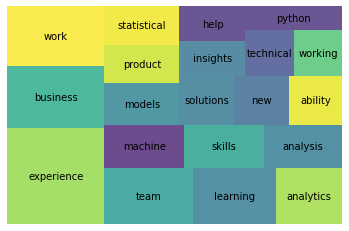

In [188]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [189]:
vect = CountVectorizer()

text = job['tokens'][0]
vect.fit(text)
    
dtm = vect.transform(text)
print(dtm)

  (0, 28)	1
  (1, 59)	1
  (2, 9)	1
  (3, 72)	1
  (4, 36)	1
  (5, 31)	1
  (6, 44)	1
  (7, 33)	1
  (8, 45)	1
  (9, 76)	1
  (10, 75)	1
  (11, 4)	1
  (13, 42)	1
  (14, 68)	1
  (15, 2)	1
  (16, 34)	1
  (17, 35)	1
  (18, 58)	1
  (19, 46)	1
  (20, 57)	1
  (21, 20)	1
  (22, 10)	1
  (23, 71)	1
  (25, 47)	1
  (26, 24)	1
  :	:
  (63, 69)	1
  (64, 66)	1
  (65, 26)	1
  (66, 24)	1
  (67, 15)	1
  (68, 65)	1
  (69, 25)	1
  (70, 62)	1
  (71, 53)	1
  (72, 30)	1
  (73, 52)	1
  (74, 73)	1
  (75, 23)	1
  (76, 29)	1
  (77, 54)	1
  (78, 3)	1
  (79, 39)	1
  (80, 11)	1
  (81, 67)	1
  (82, 40)	1
  (83, 8)	1
  (84, 56)	1
  (85, 64)	1
  (86, 18)	1
  (87, 1)	1


## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [201]:
##### Your Code Here #####
tfidf = TfidfVectorizer(stop_words='english',
                        ngram_range=(1,2),
                        min_df=5,
                        max_df=0.6
                       )
dtm = tfidf.fit_transform(job['description'])

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

print(dtm.shape)
dtm.head()

(426, 6119)


,000,000 employees,10,10 years,100,100 000,100 companies,100 countries,11,12,...,years industry,years professional,years related,years relevant,years work,years working,years xe2,yes,york,york city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [202]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [209]:
ideal_job = ['''
Python Data Manipulation Data Cleaning Data Visualization GitHub Command Line Microsoft Office.
• Used various machine-learning models to accurately predict the genre of a song. 
• Discovered insights to why a model can only be so accurate with the subjectivity of a song genre
''']

In [210]:
new = tfidf.transform(ideal_job)

In [211]:
new

<1x6119 sparse matrix of type '<class 'numpy.float64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [212]:
nn.kneighbors(new.todense())

(array([[1.31259139, 1.32730068, 1.34537018, 1.34537018, 1.34733051]]),
 array([[  0, 282, 157, 183, 128]], dtype=int64))

In [215]:
job['description'][0]

'job requirements  conceptual understanding in machine learning models like nai xc2 xa8ve bayes  k means  svm  apriori  linear  logistic regression  neural  random forests  decision trees  k nn along with hands on experience in at least 2 of them intermediate to expert level coding skills in python r   ability to write functions  clean and efficient data manipulation are mandatory for this role  exposure to packages like numpy  scipy  pandas  matplotlib etc in python or ggplot2  dplyr  tidyr in r ability to communicate model findings to both technical and non technical stake holders hands on experience in sql hive or similar programming language must show past work via github  kaggle or any other published article master s degree in statistics mathematics computer science or any other quant specific field  apply now'

In [219]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(get_word_vectors(job['description']))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(job['description']))

# let's look at our new 2D word vectors
word_vecs_2d

array([[-1.62629499e-01, -4.86340218e-01],
       [ 2.44000085e-01,  4.96532125e-02],
       [-1.98873011e-01,  8.55510320e-02],
       [ 1.45799162e-01, -2.30643162e-01],
       [-5.47670017e-01, -1.12640742e-01],
       [-4.44975045e-01,  1.99219115e-01],
       [ 3.38176690e-01,  2.08727545e-01],
       [-7.01033521e-02,  5.16080733e-02],
       [-8.69605631e-02,  1.55638509e-01],
       [ 3.66942516e-01,  1.44597571e-01],
       [-6.10726321e-02,  1.59565485e-01],
       [ 4.45934454e-01, -2.41357055e-01],
       [-1.29306611e-01, -3.77460388e-01],
       [ 3.38176690e-01,  2.08727545e-01],
       [ 1.45827920e-02,  7.71336054e-02],
       [ 2.01814533e-01,  1.47113830e-02],
       [ 3.74473357e-01, -1.81357744e-01],
       [ 2.90423721e-01,  9.57635951e-02],
       [-7.01033521e-02,  5.16080733e-02],
       [-1.45799657e-01, -4.92977693e-01],
       [-1.00154633e-01, -2.51494416e-01],
       [ 1.22752023e-01, -9.45488215e-02],
       [ 3.17594587e-02,  2.40295438e-01],
       [ 7.

In [223]:
# create a nice big plot 
plt.figure(figsize=(14,8))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(job['description'], word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

RuntimeError: In draw_glyphs_to_bitmap: Could not convert glyph to bitmap (error code 0x62)

<Figure size 1008x576 with 1 Axes>

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 